# 05_TRADES

In [1]:
import numpy as np
import random
import torch
torch.cuda.set_device(1)

In [2]:
random_seed = 617
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.cuda.manual_seed_all(random_seed) # if use multi-GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)
random.seed(random_seed)
print("Random Seed:",random_seed)

Random Seed: 617


In [3]:
# Import utils from a specific defense
from defenses.base.loader import get_loader
from defenses.base.model import get_model
from defenses.trades.train import Trainer, get_acc

Loader : Base
Model : Base
Train : TRADES


In [4]:
# Set Name
NAME = "05_TRADES"

## 1. Train

In [5]:
# Get Train, Test datasets
train_loader_ns, _ = get_loader(shuffle_train=False)
train_loader, test_loader = get_loader(shuffle_train=True)

# Get Model
model = get_model().cuda()

Files already downloaded and verified
Files already downloaded and verified
Data Loaded!
Train Data Length : 50000
Test Data Length : 10000
Files already downloaded and verified
Files already downloaded and verified
Data Loaded!
Train Data Length : 50000
Test Data Length : 10000
WRN-28 is loaded.


In [6]:
train_sets = iter(train_loader_ns).next()
test_sets = iter(test_loader).next()

In [7]:
# Train Model
trainer = Trainer(model, train_sets, test_sets,
                  eps=8/255, alpha=2/255, steps=7, beta=1.0)
trainer.train(train_loader, epochs=200,
              save_path="./_models/"+NAME,
              record_type="Epoch", save_type="Epoch")

Train Information:
-Epochs: 200
-Optimizer: SGD (
Parameter Group 0
    dampening: 0
    initial_lr: 0.1
    lr: 0.1
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0005
)
-Scheduler: <torch.optim.lr_scheduler.MultiStepLR object at 0x7f5df0c9eba8>
-Save Path: ./_models/05_TRADES
-Save Type: Per Epoch
-Record Type: Per Epoch
-Device: cuda
---------------------------------------------------------------------------------------------------------------------------------------
Epoch   Loss_Nat   Loss_Rob   Acc       Clean(Tr)   FGSM(Tr)   PGD(Tr)   GN(Tr)    Clean(Te)   FGSM(Te)   PGD(Te)   GN(Te)    lr       
1       1.7279     0.0928     36.1418   53.1250     17.1875    17.1875   51.5625   50.7812     25.0000    21.8750   52.3438   0.1000   
---------------------------------------------------------------------------------------------------------------------------------------
2       1.3293     0.1563     53.4315   63.2812     25.7812    21.0938   62.5000   57.0312     17.9688    

29      0.6029     0.2584     83.8582   82.8125     42.9688    32.0312   72.6562   83.5938     39.0625    32.8125   75.7812   0.1000   
---------------------------------------------------------------------------------------------------------------------------------------
30      0.5977     0.2581     83.7300   84.3750     47.6562    39.0625   73.4375   84.3750     36.7188    30.4688   66.4062   0.1000   
---------------------------------------------------------------------------------------------------------------------------------------
31      0.5906     0.2592     84.1206   82.8125     50.0000    40.6250   73.4375   86.7188     40.6250    36.7188   71.0938   0.1000   
---------------------------------------------------------------------------------------------------------------------------------------
32      0.5881     0.2585     84.3309   84.3750     47.6562    40.6250   69.5312   78.9062     44.5312    32.0312   72.6562   0.1000   
------------------------------------------------

59      0.5505     0.2622     85.6931   85.1562     49.2188    39.8438   77.3438   80.4688     40.6250    35.1562   77.3438   0.1000   
---------------------------------------------------------------------------------------------------------------------------------------
60      0.5506     0.2650     85.5829   85.9375     51.5625    42.9688   78.9062   82.0312     47.6562    39.8438   73.4375   0.0200   
---------------------------------------------------------------------------------------------------------------------------------------
61      0.3954     0.2516     91.3241   92.1875     60.9375    53.1250   82.0312   89.0625     53.1250    46.8750   76.5625   0.0200   
---------------------------------------------------------------------------------------------------------------------------------------
62      0.3291     0.2614     93.1631   94.5312     62.5000    55.4688   84.3750   85.9375     54.6875    49.2188   81.2500   0.0200   
------------------------------------------------

89      0.2444     0.2564     96.1959   96.8750     69.5312    59.3750   89.8438   89.8438     52.3438    44.5312   84.3750   0.0200   
---------------------------------------------------------------------------------------------------------------------------------------
90      0.2403     0.2534     96.1639   99.2188     73.4375    62.5000   90.6250   89.8438     48.4375    43.7500   77.3438   0.0200   
---------------------------------------------------------------------------------------------------------------------------------------
91      0.2386     0.2559     96.2220   99.2188     71.0938    61.7188   87.5000   87.5000     50.0000    42.1875   82.0312   0.0200   
---------------------------------------------------------------------------------------------------------------------------------------
92      0.2353     0.2557     96.1879   99.2188     70.3125    62.5000   92.1875   87.5000     49.2188    42.1875   82.0312   0.0200   
------------------------------------------------

119     0.1863     0.2486     97.3177   99.2188     78.1250    66.4062   96.8750   90.6250     50.7812    39.8438   87.5000   0.0200   
---------------------------------------------------------------------------------------------------------------------------------------
120     0.1852     0.2499     97.4159   99.2188     74.2188    61.7188   92.9688   86.7188     50.7812    41.4062   78.9062   0.0040   
---------------------------------------------------------------------------------------------------------------------------------------
121     0.1126     0.2072     99.0845   100.0000    92.9688    82.8125   96.8750   90.6250     53.9062    42.1875   81.2500   0.0040   
---------------------------------------------------------------------------------------------------------------------------------------
122     0.0836     0.1893     99.5172   100.0000    94.5312    85.1562   97.6562   88.2812     48.4375    39.8438   81.2500   0.0040   
------------------------------------------------

149     0.0293     0.1404     99.8698   100.0000    96.0938    90.6250   96.8750   90.6250     53.1250    42.1875   78.1250   0.0040   
---------------------------------------------------------------------------------------------------------------------------------------
150     0.0297     0.1408     99.8758   100.0000    96.0938    91.4062   94.5312   87.5000     53.1250    43.7500   78.1250   0.0040   
---------------------------------------------------------------------------------------------------------------------------------------
151     0.0286     0.1400     99.8638   100.0000    100.0000   90.6250   98.4375   89.0625     52.3438    42.1875   79.6875   0.0040   
---------------------------------------------------------------------------------------------------------------------------------------
152     0.0285     0.1401     99.8918   100.0000    96.0938    92.1875   99.2188   87.5000     53.1250    46.8750   78.9062   0.0040   
------------------------------------------------

179     0.0050     0.0442     99.9980   100.0000    100.0000   97.6562   95.3125   89.8438     50.7812    43.7500   77.3438   0.0008   
---------------------------------------------------------------------------------------------------------------------------------------
180     0.0047     0.0429     99.9940   100.0000    99.2188    97.6562   96.0938   90.6250     50.7812    43.7500   75.0000   0.0008   
---------------------------------------------------------------------------------------------------------------------------------------
181     0.0045     0.0424     99.9980   100.0000    99.2188    98.4375   96.0938   90.6250     51.5625    43.7500   78.1250   0.0008   
---------------------------------------------------------------------------------------------------------------------------------------
182     0.0045     0.0405     99.9920   100.0000    99.2188    97.6562   96.8750   89.8438     50.7812    42.9688   77.3438   0.0008   
------------------------------------------------

In [8]:
trainer.save_all("./_models/"+NAME)

...Saved as csv to ./_models/05_TRADES.csv !


In [9]:
print("Final Test Acc : %2.2f"%get_acc(model, test_loader))

Final Test Acc : 88.31


## 2. Record Visualization

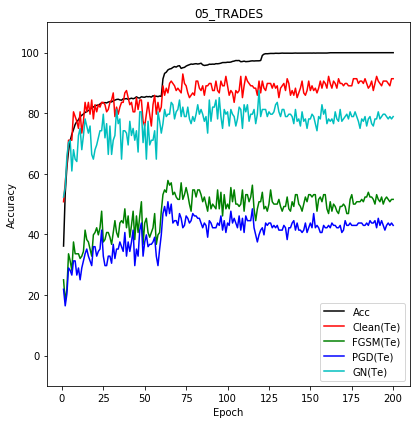

In [10]:
# Plot Train and Test Accuracy
trainer.rm.plot(title=NAME, xlabel="Epoch", ylabel="Accuracy", ylabel_second="Loss",
                x_key='Epoch', y_keys=['Acc', 'Clean(Te)', 'FGSM(Te)', 'PGD(Te)', 'GN(Te)'],
                ylim=(-10, 110), colors=['k', 'r', 'g', 'b', 'c'])

## 3. White Box Attack

In [11]:
import torchattacks
from torchattacks import FGSM, PGD, MultiAttack

In [12]:
model.load_state_dict(torch.load("./_models/"+NAME+".pth"))
model = model.cuda().eval()

### 3.1 FGSM

In [13]:
fgsm = FGSM(model, eps=8/255)
fgsm.set_mode('int')
fgsm.save(data_loader=test_loader,
          file_name="./_datasets/"+NAME+"_FGSM.pt", accuracy=True)

- Save Progress : 100.00 % / Accuracy : 57.64 %
- Save Complete!


### 3.2 PGD

In [14]:
# WB2 : PGD
pgd = PGD(model, alpha=2/255, eps=8/255, steps=50)
pgd.set_mode('int')
pgd.save(data_loader=test_loader,
         file_name="./_datasets/"+NAME+"_PGD.pt", accuracy=True)

- Save Progress : 100.00 % / Accuracy : 43.61 %
- Save Complete!


### 3.3 PGD with 10 Random Restarts

In [15]:
# WB3 : PGD
pgd = PGD(model, alpha=2/255, eps=8/255, steps=50, random_start=True)
multi = MultiAttack(model, [pgd]*10)
multi.set_mode('int')
multi.save(data_loader=test_loader,
           file_name="./_datasets/"+NAME+"_RPGD.pt", accuracy=True)

- Save Progress : 100.00 % / Accuracy : 43.11 %
- Save Complete!


## 4. Black Box Attack

In [16]:
from torch.utils.data import TensorDataset, DataLoader

In [17]:
# BB1 : WRN_28_20
adv_images, adv_labels = torch.load("./_datasets/00_WRN_28_20_PGD.pt")
adv_data = TensorDataset(adv_images.float()/255, adv_labels)
adv_loader = DataLoader(adv_data, batch_size=128, shuffle=False)
get_acc(model, adv_loader)

87.31

In [18]:
# BB2 : WRN_40_10
adv_images, adv_labels = torch.load("./_datasets/00_WRN_40_10_PGD.pt")
adv_data = torch.utils.data.TensorDataset(adv_images.float()/255, adv_labels)
adv_loader = DataLoader(adv_data, batch_size=128, shuffle=False)
get_acc(model, adv_loader)

87.11